In [2]:
import pandas as pd
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import uproot

In [7]:
# Start with 1 raw image CCD (just took the first image 5)
path = "raw_img_data/avg_Image_5_Low_Temp_109_20250807_170213_15.fz"

In [8]:
# peering at data
ext = 1  # CCD_A
with fits.open(path) as hdul:
    data = np.array(hdul[ext].data)
    header = hdul[ext].header

print(f"HDU name: {hdul[ext].name}")
print(f"Shape: {data.shape}")
print(f"Data type: {data.dtype}")

HDU name: CCD_A
Shape: (320, 640)
Data type: float64


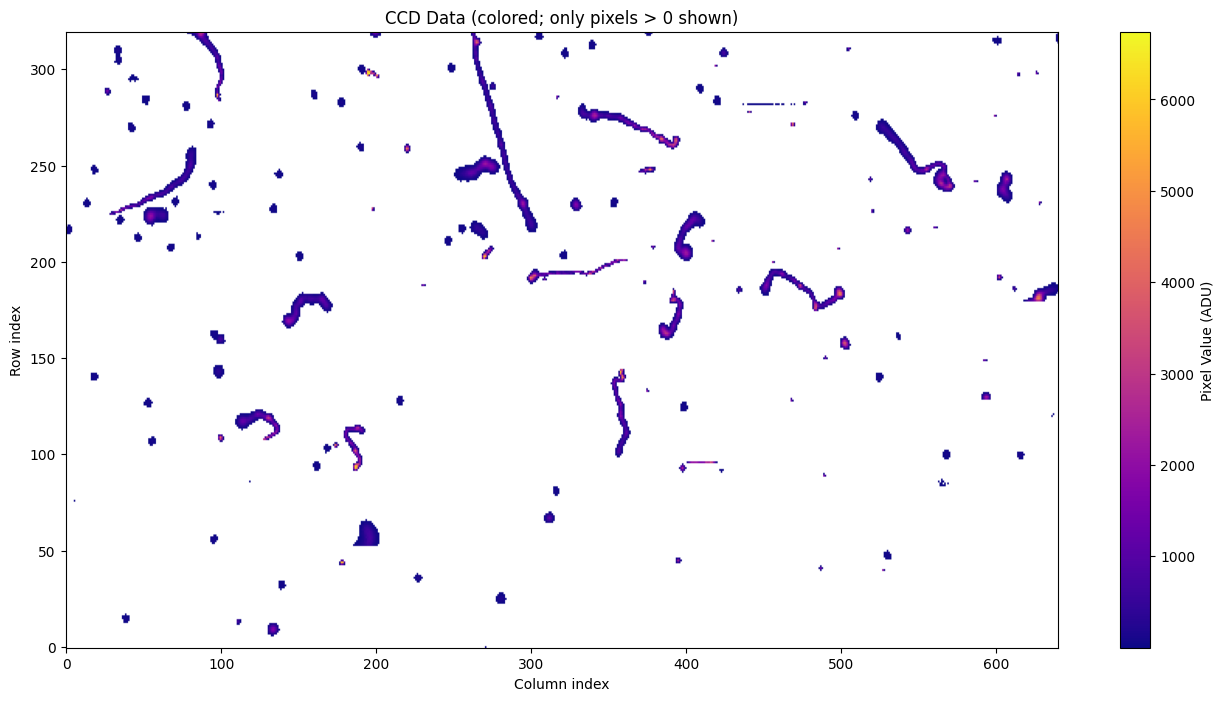

In [9]:
from matplotlib import colors

# Mask values below 2000
threshold = 0
masked_data = np.ma.masked_less(data, threshold)

# Create a colored colormap (e.g. 'plasma', 'inferno', 'viridis', etc.)
# Set masked (below-threshold) pixels to white
cmap = plt.cm.plasma.copy()
cmap.set_bad(color='white')

plt.figure(figsize=(16, 8))
plt.imshow(masked_data, cmap=cmap, origin='lower', aspect='auto')

# Add color scale and labels
plt.colorbar(label='Pixel Value (ADU)')
plt.title(f"CCD Data (colored; only pixels > {threshold} shown)")
plt.xlabel("Column index")
plt.ylabel("Row index")
plt.show()